# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 02: Extracción y Transformación de Datos </center></h1>

**Fecha de Entrega:** 25 de septiembre de 2025, a las 23:59.

**Fecha de publicación**: 2 de septiembre de 2025.

**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 02 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tarea.

- Deben hacer sus consultas y comentarios sobre la Tarea a través del canal de Tareas en el Foro del curso en Canvas.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, queremos comprender y visualizar la distribución de aves migratorias en el territorio chileno. Específicamente, queremos entender las diferencias entre las migraciones de 2 especies en particular, el run-run y la dormilona tontita, a partir de los avistamientos registrados en eBird durante un periodo de 3 años y medio.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

### 1.4 Ejemplo de visualización

Esta tarea se enfoca en datos de aves. Para complementarla, les compartimos la siguiente página web, llamada "Bird Migration Explorer" que les permite visualizar, de una forma novedosa e interesante, las rutas de migración de aves en las Americas. Visiten la página para que vean cómo se puede visualizar datos de una manera interesante y novedosa, que podría ustedes usar en el futuro para sus proyectos.

In [1]:
from IPython.display import IFrame
IFrame("https://explorer.audubon.org/home?layersPanel=expand", width=900, height=600)

## 2. Datos

Los datos a utilizar provienen de la plataforma **[eBird](https://ebird.org/)**, una aplicación desarrollada por The Cornell Lab of Ornithology que permite a sus usuarios registrar y compartir avistamientos de aves en todo el mundo. La plataforma dispone de una API mediante la cual se pueden realizar consultas sobre avistamientos de aves recientes e históricos, especies según región, taxonomía, entre otros. 

### 2.1 Acceso a la API

Muchas API pueden utilizarse solo mediante el uso de una clave única, o "API key". Para conseguir una API key en eBird, primero debe ser usuario de la plataforma. Puede crear una cuenta aquí: https://secure.birds.cornell.edu/identity/account/create


Con una cuenta ya creada, puede ingresar a https://ebird.org/api/keygen para generar su llave. Debe llenar un formulario de solicitud al pedir su llave. Como sugerencia, puede llenar los campos con la siguiente información:

* **Organización:** Pontificia Universidad Católica de Chile
* **Título del Proyecto:** Tarea IMT2200 Introducción a Ciencia de Datos
* **Descripción:** "Uso educativo para exploración y análisis de distribución de aves migratorias en Chile."
* **Tipo de Proyecto:** Academic/Student
* **Casos de uso:** Materiales educativos y artíticos (...)

Debería recibir su llave inmediatamente después de enviar su solicitud. Como recomendación, puede revisar la documentación de la API en el siguiente link: https://documenter.getpostman.com/view/664302/S1ENwy59#intro

#### 2.2 Mapoteca de BCN

Para esta tarea queremos visualizar el movimiento de aves a lo largo de nuestro país. Para ello, también necesitaremos manejar datos geoespaciales: específicamente, trabajaremos con un mapa vectorial de Chile disponible en la página web de la Biblioteca del Congreso Nacional: https://www.bcn.cl/siit/mapas_vectoriales/index_html

Descargue el archivo `.zip` para las **Divisiones regionales** y descomprímalo. Dentro de esta carpeta, habrá un archivo llamado `Regional.shp`, que utilizaremos con `geopandas` para graficar nuestro mapa de Chile.

### 2.3 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 Extracción de datos (1.5 puntos)

**(1 pto)** Vamos a crear nuestra base de datos con los avistamientos registrados en eBird dentro de Chile desde 2022 hasta 2025. Revise la documentación de la API y averigue cómo extraer los avistamientos de un día. Luego extraiga los avistamientos para todos los días desde el **1 de enero de 2022 hasta el 31 de julio de 2025.** Cuando haya logrado extraer todos los datos, guárdelos en un archivo CSV o parquet.

Responda:

**a) (0.2 pts)** ¿Cuántos avistamientos tiene su dataset?

**b) (0.3 pts)** Obtenga la cantidad de veces que se repite cada especie en su dataset y ordénelas de mayor a menor. ¿Qué pasa con la cantidad de avistamientos según especie? ¿Por qué?

**Recomendaciones:** 
* Puede usar la librería `datetime` para generar fechas: cree una lista con todas las fechas e itere sobre esta lista para hacer los llamados a la API.
* **Pruebe primero con uno o dos días** para verificar el funcionamiento de su código y de la API.
* Inspeccione la forma en la que vienen los datos.
* Vaya guardando los datos extraídos en archivos (CSV o parquet), de modo que no tenga que repetir los llamados en caso de algún error.

**Hint**: Los códigos regionales chilenos para la API son los siguientes,
* `regionCode = CL`
* `sppLocale = es_CL` (para obtener nombres chilenos de las aves)

In [3]:
"""# Extracción de datos y guardado

with open("ebird_key.txt", "r", encoding="utf-8") as file:
    key = file.readlines()[0]

headers = {"x-ebirdapitoken": key}
region_code = "CL"

start_time = datetime.datetime(2020, 1, 1)
now = start_time
end_time = datetime.datetime(2025, 7, 31)

data_raw = pd.DataFrame()

# - Para ver el progreso de la descarga -
from IPython.display import clear_output
import time
start_import = time.time()
# - -
while now <= end_time:
    # - Para ver el progreso de la descarga -
    percentage_to_finish = (100 / (end_time - start_time).days) * (now - start_time).days
    now_import = time.time()
    transcurred_time = now_import - start_import
    if percentage_to_finish != 0:
        estimated_time = (transcurred_time * 100 / percentage_to_finish) - transcurred_time
    else:
        estimated_time = 0
    clear_output(wait=True)
    print(f"{now.date()}")
    print(f"{(100 / (end_time - start_time).days) * (now - start_time).days}%")
    print(f"{datetime.timedelta(seconds=transcurred_time)} since start")
    print(f"{datetime.timedelta(seconds=estimated_time)} to finish")
    # - -
    
    year = now.year
    month = now.month
    day = now.day

    url = f"https://api.ebird.org/v2/data/obs/{region_code}/historic/{year}/{month}/{day}"
    response = requests.get(url, headers=headers)
    response_json = response.json()
    response_df = pd.json_normalize(response_json)
    
    data_raw = pd.concat([data_raw, response_df], ignore_index=True)
    
    now += datetime.timedelta(days=1)

data_raw.to_csv("raw_data.csv", mode="w", sep=",", encoding="utf-8", header=True, index=False)"""

2025-07-31
100.0%
1:19:34.043147 since start
0:00:00 to finish


In [24]:
# Abrir el archivo

data_raw = pd.read_csv("raw_data.csv", sep=",", encoding="utf-8")

#### Respuesta a)
Considerando que si se ven 5 aves del mismo tipo en el mismo avistamiento, entonces es el mismo avistamniento, los avistamientos son la cantidad de filas.

In [25]:
print(data_raw.shape[0])

393167


Hay 393167 avistamientos en el dataset.

### Respuesta b)

In [26]:
data_group_by_species_count = data_raw["sciName"].value_counts().sort_values(ascending=False)
print(data_group_by_species_count)

sciName
Tachycineta leucopyga         2039
Larus dominicanus             2039
Passer domesticus             2039
Diuca diuca                   2039
Mimus thenca                  2039
                              ... 
Piranga ludoviciana              1
Myiotheretes striaticollis       1
Buteo swainsoni                  1
Pygoscelis antarcticus           1
Ardenna pacifica                 1
Name: count, Length: 551, dtype: int64


Hay especies que se ven menos que otras, pudiendo ser por la población de la especie o la especie vive en lugares remotos o de dificil acceso para avistarla.

### 3.2 Tranformación (1 punto)

**a) (0.5 pts)** Transforme la columna `obsDt` de string a un objeto de tipo `datetime` únicamente con año, mes y día (YYYY-MM-DD). Luego, agregue las siguientes nuevas columnas:
* `month` con únicamente el mes del avistamiento (puede dejar el mes como número entero de 1 a 12).
* `year-month` con el mes y año fecha en formato YYYY-MM

In [64]:
data_raw["obsDt"] = pd.to_datetime(data_raw["obsDt"], errors="coerce")
data_raw["year"] = data_raw["obsDt"].dt.year
data_raw["month"] = data_raw["obsDt"].dt.month

**b) (0.5 pts)** Averigue cómo tranformar su DataFrame de Pandas en un GeoDataFrame de GeoPandas. Para esto, utilice las columnas `lat`y `lng` para generar los puntos de la nueva columna `geometry`. Para las visualizaciones siguientes utilizaremos el Coordinate Reference System (CRS) EPSG 4326 (también llamado [WGS 84](https://es.wikipedia.org/wiki/WGS84)). Asegúrese que sus coordenadas correspondan a este CRS al crear su GeoDataFrame.

In [29]:
data_raw["geometry"] = gpd.points_from_xy(data_raw["lng"], data_raw["lat"])
geo_df = gpd.GeoDataFrame(data_raw, geometry="geometry", crs="EPSG:4326")

### 3.3 Exploración del dataset (1 punto)

**a) (0.3 pts)** Utilice `geopandas` para leer el archivo `Regional.shp` descargado de BCN. Asegúrese de que su CRS sea el mismo que utilizó en la sección anterior.

In [36]:
regional_shp = gpd.read_file("Regiones/Regional.shp")
regional_shp = regional_shp.to_crs(geo_df.crs)

**b) (0.7 pts)** Grafique un mapa de Chile con todos los avistamientos de su dataset como puntos en el mapa. Comente: ¿Cómo se distribuyen estos avistamientos? ¿Hay lugares en Chile donde haya una menor densidad de datos? ¿Cuáles? 

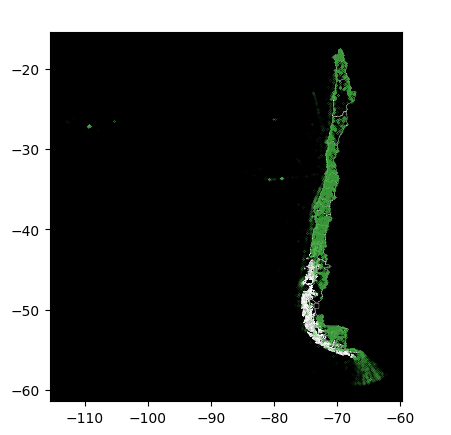

In [49]:
fig, ax = plt.subplots()

ax.set_title("Avistamnientos de aves en Chile (2020_01-2020_07")

regional_shp.plot(ax=ax, color="black", edgecolor="white", linewidth=0.25)
geo_df.plot(ax=ax, color="#50b050", alpha = 0.2, markersize = 0.02)

ax.set_facecolor("black")
plt.show()

Las regiones si tienen distintas densidades, se ve en el gráfico que la parte sur de la región de Antofagaste tiene menos avistamnientos.

### 3.4 Visualización de migraciones (2.5 puntos)

**a) (0.2 pts)** Vamos a inspeccionar los avistamientos de las siguientes 2 especies en particular:

* Run-run [(*Hymenops perspicillatus*)](https://www.avesdechile.cl/171.htm)
* Dormilona tontita [(*Muscisaxicola maclovianus*)](https://www.avesdechile.cl/043.htm)

Primero, genere dos nuevos dataframes con los avistamientos de cada especie por separado.

In [65]:
data_h = data_raw[data_raw["sciName"] == "Hymenops perspicillatus"]
data_m = data_raw[data_raw["sciName"] == "Muscisaxicola maclovianus"]

**b) (0.8 pts)** Para cada una de estas especies, agrupe los datos según `year-month`. Luego, realice un gráfico que muestre la cantidad de avistamientos en el tiempo, empezando desde enero del 2022 hasta julio de 2025. Responda: ¿cómo varía cantidad de avistamientos para estas dos especies? ¿Cuáles son sus diferencias?

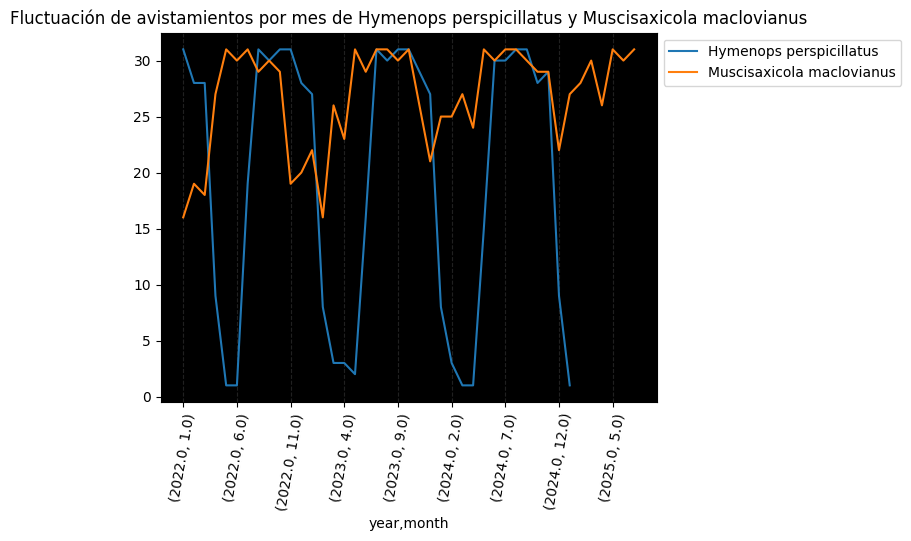

In [88]:
group_h = data_h.groupby(["year", "month"]).size()
group_m = data_m.groupby(["year", "month"]).size()

fig, ax = plt.subplots()

ax.set_title("Fluctuación de avistamientos por mes de Hymenops perspicillatus y Muscisaxicola maclovianus")

group_h[group_h.index.get_level_values(0) >= 2022].plot(ax=ax, label="Hymenops perspicillatus")
group_m[group_m.index.get_level_values(0) >= 2022].plot(ax=ax, label="Muscisaxicola maclovianus")

ax.set_facecolor("black")
ax.xaxis.grid(True, linestyle="--", color="gray", alpha=0.25)

ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=80)
plt.show()

**b) (1 pto)** Grafique en un mapa de Chile la ubicación de cada avistamiento para cada especie mencionada por separado. Utilice el color de cada punto como indicador del mes de avistamiento (columna `month`). Para esto, utilice un **colormap cíclico** para representar los meses del año. Puede utilizar el colormap disponible en la siguiente celda, o bien utilizar otro (siempre y cuando sea cíclico).

In [ ]:
import matplotlib.colors as mcolors
colors = ["coral", "blue", "coral"]
positions = [0, 0.5, 1]

# Creamos un colormap cíclico para representar meses del año
custom_cmap = mcolors.LinearSegmentedColormap.from_list("cyclic_cmap", list(zip(positions, colors)))

In [ ]:
# Respuesta

**c) (0.5 pts)** Describa las migraciones de estas dos especies. ¿Cómo se diferencian?

Respuesta